<a href="https://colab.research.google.com/github/sakshi0303/ImageClassification/blob/main/Model2_with_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model-2**
-with parameters

In [1]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# keras, owned by google (pytorch invented by facebook)
# !pip install q keras==2.3.1

In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [5]:
#importing Libraries

import numpy as np 
import pandas as pd 
import os

#high quality image has high intensity of color, color of matrix are represented by rbg matrix
import random # for geeneratiing images

#data virtulisation 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # for vision related proessing

#importing tensor-flow for model creation and its dependencies
import tensorflow

#generate batches of tensor image data with real time data augumentation
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

# for enabling inline processing
%matplotlib inline

In [6]:
#for accessing  mydrive  data mount on googlecolab 
import cv2
from google.colab.patches import cv2_imshow

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [8]:
! pip install -q kaggle

**Importing kaggle dataset directly to cobal notebook**

Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

Click on Create New API Token - It will download kaggle.json file on your machine.

**In Google Colab textbook run following commands:**

! pip install -q kaggle

from google.colab import files files.upload() Choose the kaggle.json file that you downloaded

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/ Make directory named kaggle and copy kaggle.json file there.

! chmod 600 ~/.kaggle/kaggle.json Change the permissions of the file.

! kaggle datasets list

reference:https://www.kaggle.com/general/74235

In [9]:
from google.colab import files

In [10]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srvsakshi03","key":"41190edae2633d15326ff3cf72335b85"}'}

In [11]:
! mkdir ~/.kaggle

In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
#Download datasets that are not a part of kaggle competitions.
#need kaggle.json file to run
!kaggle datasets download -d maricinnamon/caltech101-airplanes-motorbikes-schooners -p /content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/ --unzip


 34% 5.00M/14.5M [00:00<00:00, 40.6MB/s]
100% 14.5M/14.5M [00:00<00:00, 91.1MB/s]


In [15]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import splitfolders

In [17]:
# Split with a ratio.
splitfolders.ratio("/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/caltech101_classification", output="/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)


Copying files: 1661 files [00:00, 3341.16 files/s]


In [47]:
TrainImgPath='/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/train'
TestImgPath='/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/test'
ValidImgPath='/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/val'


#shear_range: tilt angle of image
#zoom range: zoom in or out
#horizontal_image- mirror image from one direction to other direction
#scale the image down to avoid large computation

#defining preprocessing transformations on raw image of testing data
train_datagenerator= ImageDataGenerator(rescale=1./255, 
                                        horizontal_flip=True, 
                                        shear_range=0.1, 
                                        zoom_range=0.1) 

#defining preprocessing transformation on testing data
test_datagenerator=ImageDataGenerator(rescale=1./255) 

#generating the Training Data
training_set=train_datagenerator.flow_from_directory(TrainImgPath,target_size=(128,128),batch_size=32,
class_mode='categorical')

#generating the Testing Data
testing_set=test_datagenerator.flow_from_directory(TestImgPath,
                                                    target_size=(128,128),
                                                    batch_size=32,class_mode='categorical')

valid_set=test_datagenerator.flow_from_directory(ValidImgPath,
                                                  target_size=(128,128),
                                                  batch_size=32,class_mode='categorical')

Found 1328 images belonging to 3 classes.
Found 168 images belonging to 3 classes.
Found 165 images belonging to 3 classes.


In [48]:
testing_set.class_indices

{'Motorbikes': 0, 'airplanes': 1, 'schooner': 2}

In [49]:
TrainClasses=training_set.class_indices

#storing numeric tag for future refernce
Resultmap={}
for ballvalue,ballname in zip(TrainClasses.values(),TrainClasses.keys()):
  Resultmap[ballvalue]=ballname

import pickle
with open("/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/ResultsMap.pk1",'wb') as f:
  pickle.dump(Resultmap,f,pickle.HIGHEST_PROTOCOL)

print("Mapping",Resultmap)

OutputNeurons=len(Resultmap)
print('\n The number of output neurons',OutputNeurons)


Mapping {0: 'Motorbikes', 1: 'airplanes', 2: 'schooner'}

 The number of output neurons 3


In [50]:
#### Create CNN deep learning model#######
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

### Initializing the convolutional Neural Network
classifier=Sequential() 
classifier.add(Convolution2D(32,kernel_size=(3,3),strides=(1,1),input_shape=(128,128,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))
#flattening
classifier.add(Flatten())
#fully connected neural Network
classifier.add(Dense(256,activation='relu'))

# binary class--> sigmoid activation
#more that 2 classes-->  softmax activation code
classifier.add(Dense(OutputNeurons,activation='softmax'))

#compling the CNN
#optimizer='adam'
classifier.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])


In [51]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [52]:
#measuring the time taken by model to train
import time
StartTime=time.time()

#starting modeltraing
model_history=classifier.fit_generator(
                                       training_set,
                                       steps_per_epoch=len(training_set),
                                       epochs=20,
                                       validation_data=valid_set,
                                       validation_steps=len(valid_set),
                                       verbose=1)

EndTime=time.time()
print("Total Time Taken ",round((EndTime-StartTime)/60),'Minutes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
42/42 [==============================] - 66s 950ms/step - loss: 1.3974 - accuracy: 0.8072 - val_loss: 0.1330 - val_accuracy: 0.9515
Epoch 2/20
42/42 [==============================] - 40s 944ms/step - loss: 0.2557 - accuracy: 0.9292 - val_loss: 0.1621 - val_accuracy: 0.9212
Epoch 3/20
42/42 [==============================] - 40s 940ms/step - loss: 0.1467 - accuracy: 0.9586 - val_loss: 0.0899 - val_accuracy: 0.9758
Epoch 4/20
42/42 [==============================] - 40s 938ms/step - loss: 0.1028 - accuracy: 0.9631 - val_loss: 0.1135 - val_accuracy: 0.9697
Epoch 5/20
42/42 [==============================] - 41s 973ms/step - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.4191 - val_accuracy: 0.9091
Epoch 6/20
42/42 [==============================] - 40s 938ms/step - loss: 0.1002 - accuracy: 0.9699 - val_loss: 0.0613 - val_accuracy: 0.9879
Epoch 7/20
42/42 [==============================] - 41s 979ms/step - loss: 0.0624 - accuracy: 0.9857 - val_loss: 0.1053 - val_accuracy: 0.9636

In [53]:
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

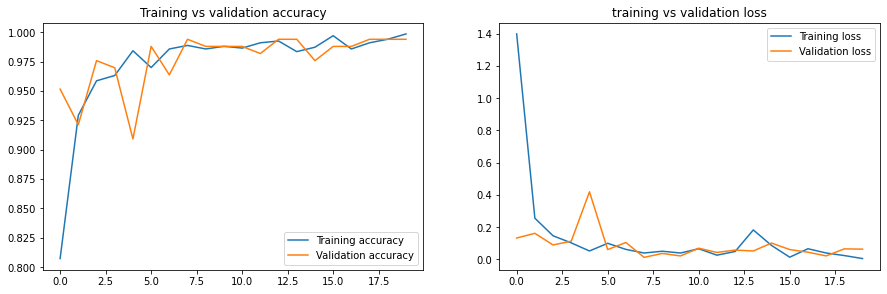

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(accuracy,label="Training accuracy")
plt.plot(val_accuracy,label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss,label="Training loss")
plt.plot(val_loss,label="Validation loss")
plt.legend()
plt.title("training vs validation loss")
plt.show()



In [55]:
#Saving the model
classifier.save("/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/ImageClassifier.pk1")

In [56]:
training_set.class_indices.items()

dict_items([('Motorbikes', 0), ('airplanes', 1), ('schooner', 2)])

###Testing the model

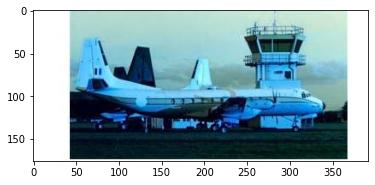

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prediction is:  airplanes


In [57]:
#Making_single_predictions
from tensorflow.keras.utils import load_img,img_to_array

testImage="/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/test/airplanes/image_0013.jpg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
img=cv2.imread(testImage)

plt.imshow(img)
plt.show()
print("------------"*50)
print('Prediction is: ',map[np.argmax(result)])

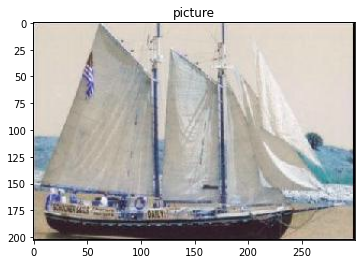

__________
Prediction is:  schooner


In [59]:
#Making_single_predictions
from tensorflow.keras.utils import load_img,img_to_array

testImage="/content/drive/MyDrive/caltech101-airplanes-motorbikes-schooners/SplitData/test/schooner/image_0024.jpg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
img=cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()
print("_"*10)
print('Prediction is: ',Resultmap[np.argmax(result)])